In [115]:
import os
import pandas as pd
import numpy as np

In [39]:
for folder in os.listdir('data/sessions')[:10]:
    try:
        print(folder, os.listdir('data/sessions/%s'%(folder)))
    except:
        pass

3XuyHXh1k92uQoOyiUDr ['session.json', 'snapshots.json']
jNNLEB87PnIupHntDPDK ['session.json', 'snapshots.json']
nx39Y3m8fACWC1hRraqB ['session.json', 'snapshots.json']
6Yx20Y9IEnYY3165J5hb ['dataset-metadata.json', 'session.json', 'snapshots.json', 'dataset.csv']
9kBX86m8AhSzrgrQK9a8 ['session.json', 'snapshots.json']
X6Ymc3XbLTel9Pyixx29 ['dataset-metadata.json', 'session.json', 'snapshots.json', 'dataset.csv']
Vs9fXwa413iUeX49Odpt ['session.json', 'snapshots.json']
tso7fH0OdafDTxbJt3Od ['session.json', 'snapshots.json']
ra2o50Hgmig9wIpDEw4I ['dataset-metadata.json', 'session.json', 'snapshots.json', 'dataset.csv']
aqEW0vNFUSQk3jKqmU6F ['session.json', 'snapshots.json']


In [40]:
df = pd.read_csv('data/sessions/6Yx20Y9IEnYY3165J5hb/dataset.csv')
df[:5]

0   13729.087890625   3156.1552734375   6635.91943359375   -3254.32421875  \
0  1      10369.352539      -2097.554443       -3001.525879     -5391.172852   
1  2      10073.572266      -5006.410156      -10156.788086     -6105.646484   
2  3      13544.149414        -59.276821       -1532.614258     -3951.028076   
3  4      14332.919922       3507.122314        6889.455078     -3024.928223   
4  5      11229.470703       -441.759827         349.357727     -4802.897461   

    -3191.962890625   7830.64208984375   10561.2646484375   10948.8447265625  \
0      -5577.117188       -2691.730957          17.769634        2209.402588   
1      -6645.307129      -12438.006836      -10010.942383       -6275.296387   
2      -4278.056152       -3178.149414        -744.581238        1370.474731   
3      -2977.654297        7704.846680       10433.055664       10787.375000   
4      -4881.083984        1180.104858        3984.488525        5501.747070   

       1691443808299.948  
0           1.691444e+12  
1           1.691444e+12  
2           1.691444e+12  
3           1.691444e+12  
4           1.691444e+12

In [15]:
df.shape

(19743, 11)

In [35]:
channel_names = ["index", "channel1", 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8', 'empty', "timestamp"]
df = pd.read_csv('data/sessions/6Yx20Y9IEnYY3165J5hb/dataset.csv', header=None, names=channel_names)

root_path = 'data/sessions'
data_paths = []
for folder in os.listdir(root_path):
    try:
        for name in os.listdir(root_path + '/%s'%(folder)):
            if name == 'dataset.csv':
                data_paths.append(root_path + '/%s/%s'%(folder, name))
    except:
        pass
    

In [88]:
import pandas as pd
import os

# Define the column names and root path
channel_names = ["index", 'CP3', 'C3', 'F5', 'PO3', 'PO4', 'F6', 'C4', 'CP4', 'empty', "timestamp"]
root_path = 'data/sessions'
path = 'data/sessions/6Yx20Y9IEnYY3165J5hb/dataset.csv'
df = pd.read_csv(path, header=None, names=channel_names)

In [94]:
df['session_id'] = [path.split('/')[-2]]*len(df)

In [95]:
import pandas as pd
import os

# Define the column names and root path
channel_names = ["index", 'CP3', 'C3', 'F5', 'PO3', 'PO4', 'F6', 'C4', 'CP4', 'empty', "timestamp"]
root_path = 'data/sessions'

# Function to get all dataset.csv paths
def find_csv_paths(root_path):
    data_paths = []
    for folder in os.listdir(root_path):
        folder_path = os.path.join(root_path, folder)
        if os.path.isdir(folder_path):
            csv_path = os.path.join(folder_path, 'dataset.csv')
            if os.path.isfile(csv_path):
                data_paths.append(csv_path)
    return data_paths

data_paths = find_csv_paths(root_path)

# Read and concatenate all CSV files
def concatenate_csvs(paths, column_names):
    df_list = []
    for path in paths:
        df = pd.read_csv(path, header=None, names=column_names)
        df['session_id'] = [path.split('/')[-2]]*len(df)
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# Create one large DataFrame
large_df = concatenate_csvs(data_paths, channel_names)
large_df = large_df.drop('index', axis=1)
large_df = large_df.drop('empty', axis=1)

In [96]:
output_path = 'data/combined_dataset.csv'
large_df.to_csv(output_path, index=False)

print(f"Combined CSV written to {output_path}")

Combined CSV written to data/combined_dataset.csv


In [84]:
data_paths[0].split('/')[-2]

'6Yx20Y9IEnYY3165J5hb'

In [55]:
# large_df.columns = ['CP3', 'C3', 'F5', 'PO3', 'PO4', 'F6', 'C4', 'CP4', "timestamp"]

In [58]:
# large_df

In [60]:
import matplotlib.pyplot as plt

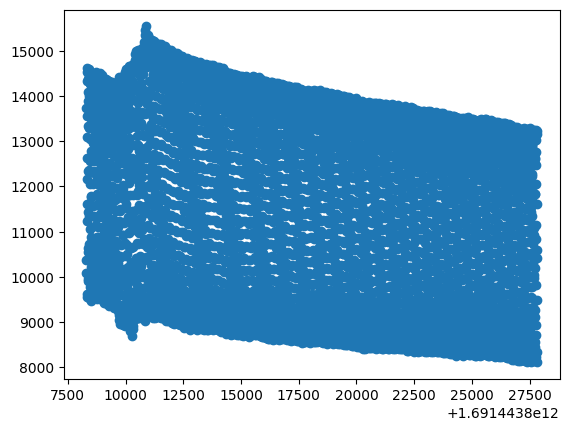

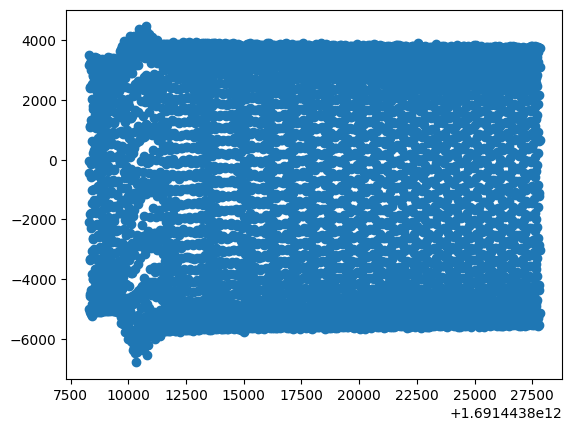

In [99]:
steps = 5000
plt.scatter(large_df['timestamp'][:steps], large_df['CP3'][:steps])
plt.show()
plt.scatter(large_df['timestamp'][:steps], large_df['C3'][:steps])
plt.show()

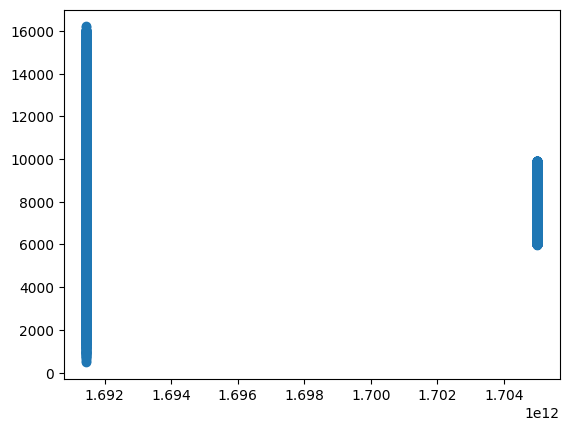

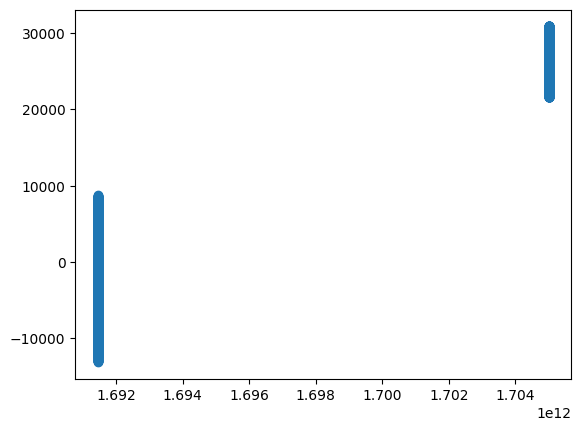

In [81]:
steps = 30000
plt.scatter(large_df['timestamp'][:steps], large_df['CP3'][:steps])
plt.show()
plt.scatter(large_df['timestamp'][:steps], large_df['C3'][:steps])
plt.show()

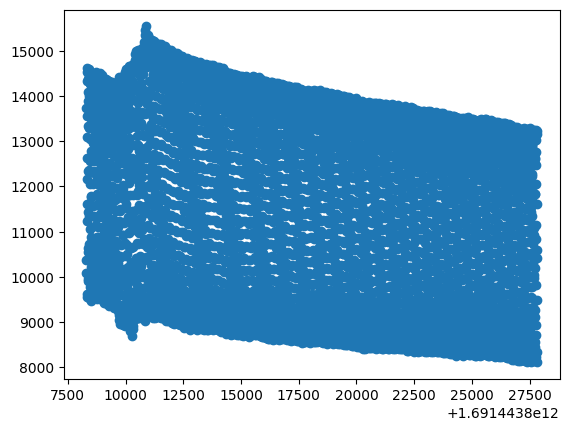

In [72]:
plt.scatter(large_df['timestamp'][:5000], large_df['CP3'][:5000])
plt.show()

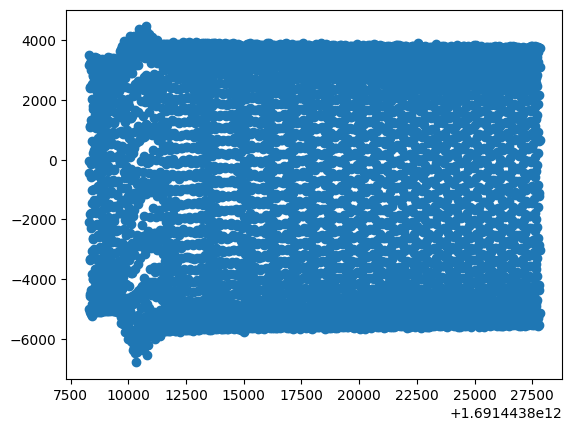

In [71]:
plt.scatter(large_df['timestamp'][:5000], large_df['C3'][:5000])
plt.show()

In [18]:
channel_names = ["channel" + str(i) for i in range(2, 9)]
print(channel_names)

['channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8']


In [ ]:
large_df.drop
# Save the large DataFrame to a new CSV file
output_path = 'data/combined_dataset.csv'
large_df.to_csv(output_path, index=False)

print(f"Combined CSV written to {output_path}")

In [97]:
len(large_df)

10983584

In [102]:
len(large_df['session_id'].value_counts())

131

In [103]:
def sliding_window(df, window_size=32):
    # Ensure the dataframe is sorted by timestamp
    df = df.sort_values('timestamp')
    # Collect the sliding windows
    return [df.iloc[i:i+window_size] for i in range(len(df) - window_size + 1)]

In [108]:
# Grouping the dataframe by session_id
grouped = large_df[:100000].groupby('session_id')

# Applying the sliding window function to each group
sliding_windows = grouped.apply(sliding_window).reset_index(level=0, drop=True)

In [112]:
# Let's start with a single column.
# sort by timestamp. Then predict CP3 with a linear model.

In [117]:
sessions = np.unique(large_df['session_id'])

In [120]:
session_df = large_df[large_df['session_id'] == sessions[0]].sort_values('timestamp')

In [122]:
session_df['CP3']

2921136   -21546.587891
2921137   -19553.773438
2921138   -19902.392578
2921139   -21431.050781
2921140   -21953.814453
               ...     
3001579   -16794.250000
3001580   -18833.869141
3001581   -18129.185547
3001582   -16341.626953
3001583   -16225.553711
Name: CP3, Length: 80448, dtype: float64

In [125]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def create_dataset(data, window_size=32):
    data = list(data)
    x_train = []
    y_train = []
    for i in range(len(data) - window_size):
        x_train.append(data[i:i + window_size])
        y_train.append(data[i + window_size])
    x_train, y_train = np.array(x_train), np.array(y_train)
    return x_train, y_train

# Example data
# data = np.random.randn(1000)  # Simulated random data

# Create the dataset
x_train, y_train = create_dataset(session_df['CP3'])

# Split the data into training and validation sets
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train_split, y_train_split)

# Make predictions
y_pred = model.predict(x_val)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

# Additional: Comparing a few predictions with actual values
print("Sample predictions vs actual values:")
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {y_val[i]}")


Mean Squared Error: 1321.7537046108525
Sample predictions vs actual values:
Predicted: -17612.367520497766, Actual: -17596.431640625
Predicted: -18714.184546635788, Actual: -18688.15625
Predicted: -18686.2822787348, Actual: -18718.869140625
Predicted: -21418.31289555474, Actual: -21397.255859375
Predicted: -16679.317634097664, Actual: -16669.392578125


In [126]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def create_dataset(data, window_size=32):
    data = list(data)    
    x_train = []
    y_train = []
    for i in range(len(data) - window_size):
        x_train.append(data[i:i + window_size])
        y_train.append(data[i + window_size])
    x_train, y_train = np.array(x_train), np.array(y_train)
    return x_train, y_train

# Example data
# data = np.random.randn(1000)  # Simulated random data

# Create the dataset
x_train, y_train = create_dataset(session_df['CP3'])

# Split the data into training and validation sets
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train_split, y_train_split)

# Make predictions with linear regression model
y_pred_lr = model.predict(x_val)

# Make predictions with persistence model
y_pred_persistence = x_val[:, -1]  # Select the last item from each window in the validation set

# Calculate and print the Mean Squared Error for both models
mse_lr = mean_squared_error(y_val, y_pred_lr)
mse_persistence = mean_squared_error(y_val, y_pred_persistence)

print("Linear Regression Model Mean Squared Error:", mse_lr)
print("Persistence Model Mean Squared Error:", mse_persistence)

# Additional: Comparing a few predictions with actual values
print("Sample predictions vs actual values (Linear Regression):")
for i in range(5):
    print(f"Predicted: {y_pred_lr[i]}, Actual: {y_val[i]}")

print("Sample predictions vs actual values (Persistence):")
for i in range(5):
    print(f"Predicted: {y_pred_persistence[i]}, Actual: {y_val[i]}")

Linear Regression Model Mean Squared Error: 1321.7537046108525
Persistence Model Mean Squared Error: 2667362.5640782895
Sample predictions vs actual values (Linear Regression):
Predicted: -17612.367520497766, Actual: -17596.431640625
Predicted: -18714.184546635788, Actual: -18688.15625
Predicted: -18686.2822787348, Actual: -18718.869140625
Predicted: -21418.31289555474, Actual: -21397.255859375
Predicted: -16679.317634097664, Actual: -16669.392578125
Sample predictions vs actual values (Persistence):
Predicted: -16807.123046875, Actual: -17596.431640625
Predicted: -16600.9296875, Actual: -18688.15625
Predicted: -17038.197265625, Actual: -18718.869140625
Predicted: -19829.4375, Actual: -21397.255859375
Predicted: -18242.10546875, Actual: -16669.392578125


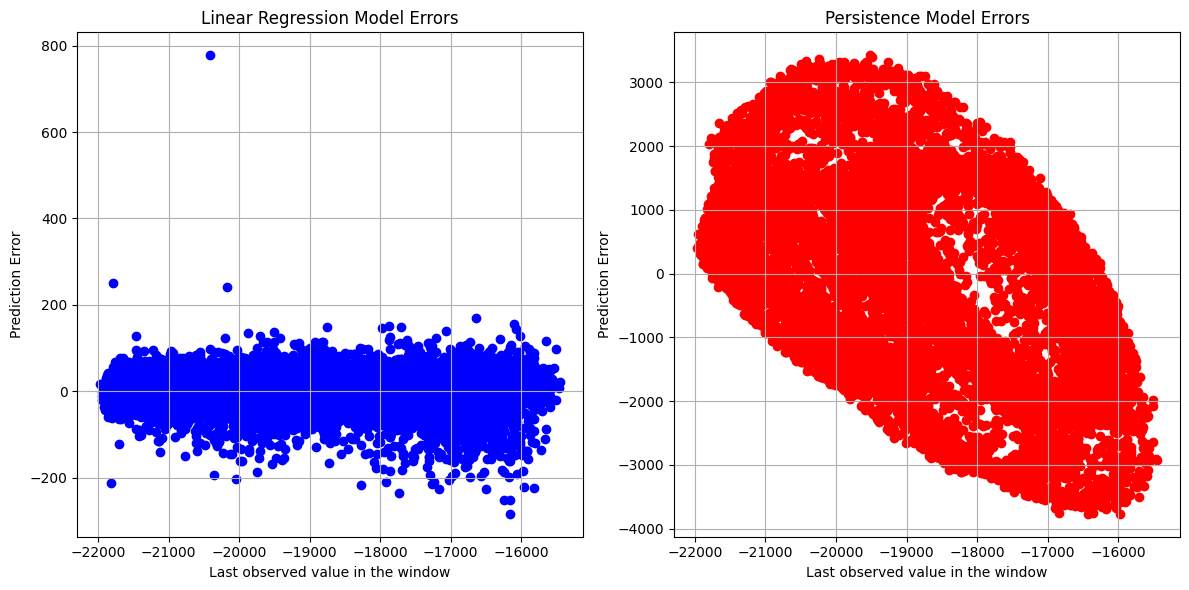

In [127]:
import matplotlib.pyplot as plt

# Calculate errors
errors_lr = y_val - y_pred_lr
errors_persistence = y_val - y_pred_persistence

# Plotting
plt.figure(figsize=(12, 6))

# Linear Regression Errors Plot
plt.subplot(1, 2, 1)
plt.scatter(x_val[:, -1], errors_lr, color='blue')
plt.title('Linear Regression Model Errors')
plt.xlabel('Last observed value in the window')
plt.ylabel('Prediction Error')
plt.grid(True)

# Persistence Model Errors Plot
plt.subplot(1, 2, 2)
plt.scatter(x_val[:, -1], errors_persistence, color='red')
plt.title('Persistence Model Errors')
plt.xlabel('Last observed value in the window')
plt.ylabel('Prediction Error')
plt.grid(True)

plt.tight_layout()
plt.show()

In [128]:
session_df[:5]

CP3            C3            F5          PO3           PO4  \
2921136 -21546.587891 -11764.772461 -14893.099609 -2791.240723 -18194.765625   
2921137 -19553.773438 -10292.105469 -14001.935547 -2784.736572 -18186.517578   
2921138 -19902.392578 -11346.616211 -15681.602539 -2770.453613 -18169.417969   
2921139 -21431.050781 -12563.400391 -16707.882812 -2772.197021 -18169.753906   
2921140 -21953.814453 -12228.458984 -15506.856445 -2791.576172 -18194.496094   

                  F6           C4           CP4     timestamp  \
2921136  1398.101440 -1965.321655 -21022.617188  1.697072e+12   
2921137  1593.634521   218.465927 -20592.726562  1.697072e+12   
2921138  1628.570312   838.927917 -20586.423828  1.697072e+12   
2921139  1508.139038  -558.704163 -20868.726562  1.697072e+12   
2921140  1377.649658 -2090.245605 -21086.923828  1.697072e+12   

                   session_id  
2921136  04WdQ3hau8P7jP1LDvWy  
2921137  04WdQ3hau8P7jP1LDvWy  
2921138  04WdQ3hau8P7jP1LDvWy  
2921139  04WdQ3hau8P7jP1LDvWy  
2921140  04WdQ3hau8P7jP1LDvWy

/var/folders/nf/0ddppczj5wn6s4m23ymy4y740000gn/T/ipykernel_60055/4222272019.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(session_df['timestamp'][:size], session_df['CP3'][:size])


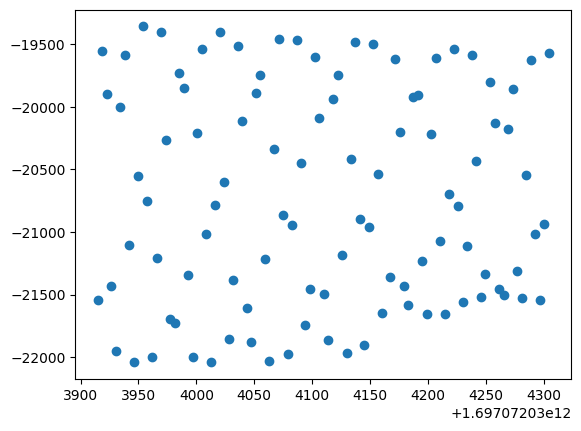

In [132]:
size = 100
plt.scatter(session_df['timestamp'][:size], session_df['CP3'][:size])

In [136]:
# import copy
# from pathlib import Path
# import warnings

# import lightning.pytorch as pl
# from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
# from lightning.pytorch.loggers import TensorBoardLogger
# import numpy as np
# import pandas as pd
# import torch

# from pytorch_forecasting import Baseline
# from pytorch_forecasting import TemporalFusionTransformer
# from pytorch_forecasting import TimeSeriesDataSet
# from pytorch_forecasting.data import GroupNormalizer
# from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss
# from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

In [137]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvTransformerModel(nn.Module):
    def __init__(self):
        super(ConvTransformerModel, self).__init__()

        # CNN part
        self.conv1 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, padding=1)  # Input is 32x8, output is 32x16
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)  # Output is 32x32
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)  # Output is 16x32

        # Transformer part
        # Assuming model dimensions as a multiple of number of heads (e.g., 32)
        transformer_layer = nn.TransformerEncoderLayer(d_model=32, nhead=8, batch_first=True)
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=1)

        # Regression head
        self.fc1 = nn.Linear(16 * 32, 8)  # Fully connected layer for regression

    def forward(self, x):
        # Reshape input to fit Conv1D: batch_size x channels x length
        x = x.permute(0, 2, 1)  # now shape is batch_size x 8 x 32

        # CNN operations
        x = F.relu(self.conv1(x))  # Apply convolution and activation function
        x = F.relu(self.conv2(x))
        x = self.pool(x)  # Reducing dimension to 16 x 32

        # Transformer operations
        x = x.permute(0, 2, 1)  # Reshape for transformer: batch_size x seq_len x feature (16 x 32)
        x = self.transformer(x)

        # Flatten and pass through the regression head
        x = torch.flatten(x, start_dim=1)  # Flatten to prepare for the linear layer
        x = self.fc1(x)  # Final regression output

        return x

# Example usage
model = ConvTransformerModel()
input_tensor = torch.randn(10, 32, 8)  # batch size of 10, 32x8
output = model(input_tensor)
print("Output shape:", output.shape)  # Should be [10, 8] corresponding to 10 samples of 1x8 output

Output shape: torch.Size([10, 8])


In [142]:
large_df[:5]
# Iterate through sessions to construct a dataset.
for session in sessions[:1]:
    session_df = large_df[large_df['session_id']==session]
    session_df = session_df.drop(['session_id','timestamp'], axis=1)

CP3            C3            F5          PO3           PO4  \
2921136 -21546.587891 -11764.772461 -14893.099609 -2791.240723 -18194.765625   
2921137 -19553.773438 -10292.105469 -14001.935547 -2784.736572 -18186.517578   
2921138 -19902.392578 -11346.616211 -15681.602539 -2770.453613 -18169.417969   
2921139 -21431.050781 -12563.400391 -16707.882812 -2772.197021 -18169.753906   
2921140 -21953.814453 -12228.458984 -15506.856445 -2791.576172 -18194.496094   
...               ...           ...           ...          ...           ...   
3001579 -16794.250000  -9520.835938 -13135.850586 -5936.332031 -22818.156250   
3001580 -18833.869141 -12195.736328 -15737.592773 -5928.889160 -22806.085938   
3001581 -18129.185547 -10798.774414 -14381.267578 -5946.524414 -22823.921875   
3001582 -16341.626953  -8028.991699 -11434.190430 -5961.008301 -22841.759766   
3001583 -16225.553711  -8597.016602 -12201.234375 -5942.232910 -22819.697266   

                  F6           C4           CP4  
2921136  1398.101440 -1965.321655 -21022.617188  
2921137  1593.634521   218.465927 -20592.726562  
2921138  1628.570312   838.927917 -20586.423828  
2921139  1508.139038  -558.704163 -20868.726562  
2921140  1377.649658 -2090.245605 -21086.923828  
...              ...          ...           ...  
3001579  3395.274170   514.380615 -20178.996094  
3001580  3361.076172  -208.944077 -20241.357422  
3001581  3336.265625  -357.404358 -20296.074219  
3001582  3327.481445  -220.879913 -20295.203125  
3001583  3395.743652   590.354187 -20168.736328  

[80448 rows x 8 columns]

In [164]:
# Establish train validaiton split
training_datapoints = []
training_labels = []
validation_datapoints = []
validation_labels = []

# Define the split point
split_point = int((len(session_df) - 33) * 0.8)

for i in range(len(session_df) - 33):
    datapoint = session_df[i:32+i].to_numpy()
    label = session_df.iloc[32+i+1].to_numpy()
    
    if i < split_point:
        training_datapoints.append(datapoint)
        training_labels.append(label)
    else:
        validation_datapoints.append(datapoint)
        validation_labels.append(label)

In [165]:
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

# class ConvTransformerModel(nn.Module):
#     def __init__(self):
#         super(ConvTransformerModel, self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
#         transformer_layer = nn.TransformerEncoderLayer(d_model=32, nhead=8, batch_first=True)
#         self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=1)
#         self.fc1 = nn.Linear(16 * 32, 8)

#     def forward(self, x):
#         x = x.permute(0, 2, 1)
#         x = F.relu(self.conv1(x))
#         x = F.relu(self.conv2(x))
#         x = self.pool(x)
#         x = x.permute(0, 2, 1)
#         x = self.transformer(x)
#         x = torch.flatten(x, start_dim=1)
#         x = self.fc1(x)
#         return x

# # Convert lists of numpy arrays to PyTorch tensors
# inputs = torch.tensor(training_datapoints, dtype=torch.float32)
# labels = torch.tensor(training_labels, dtype=torch.float32).squeeze(1)  # Remove the unnecessary dimension

# # Create a TensorDataset and DataLoader
# dataset = TensorDataset(inputs, labels)
# dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# # Define the model, optimizer, and loss function
# model = ConvTransformerModel()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.MSELoss()

# # Training loop
# num_epochs = 10
# for epoch in range(num_epochs):
#     model.train()  # Set the model to training mode
#     total_loss = 0
#     for data, target in dataloader:
#         optimizer.zero_grad()
#         output = model(data)
#         loss = criterion(output, target)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
    
#     print(f'Epoch {epoch+1}, Loss: {total_loss / len(dataloader)}')

# # After training, you can evaluate the model or use it for predictions.


In [166]:
# Train a linear model for each channel.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Flatten each (32, 8) training datapoint to (256,) and stack to create a (100, 256) array
training_data = np.array([dp.flatten() for dp in training_datapoints])
training_labels_matrix = np.vstack(training_labels).reshape(-1, 8)  # reshaping to (100, 8) from list of (1, 8)

# Flatten each (32, 8) validation datapoint to (256,) and stack to create a (20, 256) array
validation_data = np.array([dp.flatten() for dp in validation_datapoints])
validation_labels_matrix = np.vstack(validation_labels).reshape(-1, 8)  # reshaping to (20, 8)

# Initialize list to hold models and MSE scores
models = []
mse_scores = []

# Train a model for each of the 8 target variables
for i in range(8):
    model = LinearRegression()
    target = training_labels_matrix[:, i]  # Extract the i-th target variable
    model.fit(training_data, target)
    models.append(model)

    # Predict on validation data and calculate MSE
    predictions = model.predict(validation_data)
    mse = mean_squared_error(validation_labels_matrix[:, i], predictions)
    mse_scores.append(mse)

# Calculate and output the aggregate MSE across all channels
aggregate_mse = np.mean(mse_scores)
print(f'Aggregate MSE across all channels: {aggregate_mse}')

Aggregate MSE across all channels: 624.338619265959


In [167]:
# Aggregate CNN Model
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class ConvTransformerModel(nn.Module):
    def __init__(self):
        super(ConvTransformerModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        transformer_layer = nn.TransformerEncoderLayer(d_model=32, nhead=8, batch_first=True)
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=1)
        self.fc1 = nn.Linear(16 * 32, 8)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.permute(0, 2, 1)
        x = self.transformer(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc1(x)
        return x

# Convert lists of numpy arrays to PyTorch tensors
train_inputs = torch.tensor(training_datapoints, dtype=torch.float32)
train_labels = torch.tensor(training_labels, dtype=torch.float32).squeeze(1)

valid_inputs = torch.tensor(validation_datapoints, dtype=torch.float32)
valid_labels = torch.tensor(validation_labels, dtype=torch.float32).squeeze(1)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

valid_dataset = TensorDataset(valid_inputs, valid_labels)
valid_loader = DataLoader(valid_dataset, batch_size=10, shuffle=False)

# Define the model, optimizer, and loss function
model = ConvTransformerModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training and validation loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation phase
    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for data, target in valid_loader:
            output = model(data)
            loss = criterion(output, target)
            validation_loss += loss.item()

    print(f'Epoch {epoch+1}, Training Loss: {train_loss / len(train_loader)}, Validation Loss: {validation_loss / len(valid_loader)}')

# Optionally, compute the overall MSE for the validation data after training
total_mse = 0
with torch.no_grad():
    for data, target in valid_loader:
        output = model(data)
        total_mse += criterion(output, target).item()

mean_mse = total_mse / len(valid_loader)
print(f'Mean Squared Error on Validation Set: {mean_mse}')

Epoch 1, Training Loss: 49709433.59310402, Validation Loss: 1743544.7181479179
Epoch 2, Training Loss: 238710.72469998858, Validation Loss: 47345.23970512547
Epoch 3, Training Loss: 23269.95122097633, Validation Loss: 65997.46069715274
Epoch 4, Training Loss: 19897.288963804047, Validation Loss: 33903.312480577995
Epoch 5, Training Loss: 15119.374036263041, Validation Loss: 19419.280247339186
Epoch 6, Training Loss: 11644.728656212661, Validation Loss: 15034.428459968827
Epoch 7, Training Loss: 8953.005335273305, Validation Loss: 13791.92809732365
Epoch 8, Training Loss: 7843.530474927509, Validation Loss: 19659.400423399627
Epoch 9, Training Loss: 7643.439227558642, Validation Loss: 20163.35778694793
Epoch 10, Training Loss: 6717.0051090618745, Validation Loss: 27980.54553822007
Mean Squared Error on Validation Set: 27980.54553822007


In [170]:
df = pd.read_csv('data/combined_dataset.csv')

In [171]:
df

CP3           C3            F5          PO3          PO4  \
0         13729.087891  3156.155273   6635.919434 -3254.324219 -3191.962891   
1         10369.352539 -2097.554443  -3001.525879 -5391.172852 -5577.117188   
2         10073.572266 -5006.410156 -10156.788086 -6105.646484 -6645.307129   
3         13544.149414   -59.276821  -1532.614258 -3951.028076 -4278.056152   
4         14332.919922  3507.122314   6889.455078 -3024.928223 -2977.654297   
...                ...          ...           ...          ...          ...   
10983579  12792.997070  7075.868652   7357.366211  8604.458984  7955.968262   
10983580  14811.225586  7029.667480   6521.321777  6404.712891  5610.108398   
10983581  11129.893555  4071.324951   3972.485596  4086.077148  3282.755615   
10983582  -6475.456055 -8303.180664  -7860.146484 -2196.125732 -2567.812744   
10983583  -8533.783203 -7936.388184  -7326.520996  1114.256714   999.391052   

                    F6            C4           CP4     timestamp  \
0          7830.642090  10561.264648  10948.844727  1.691444e+12   
1         -2691.730957     17.769634   2209.402588  1.691444e+12   
2        -12438.006836 -10010.942383  -6275.296387  1.691444e+12   
3         -3178.149414   -744.581238   1370.474731  1.691444e+12   
4          7704.846680  10433.055664  10787.375000  1.691444e+12   
...                ...           ...           ...           ...   
10983579  44063.261719   6835.140137  27925.751953  1.707322e+12   
10983580  44058.570312   6936.729004  27963.035156  1.707322e+12   
10983581  44052.667969   3834.888428  23298.539062  1.707322e+12   
10983582  44017.261719  -7619.216797   8506.357422  1.707322e+12   
10983583  44002.375000  -6791.688477   9733.267578  1.707322e+12   

                    session_id  
0         6Yx20Y9IEnYY3165J5hb  
1         6Yx20Y9IEnYY3165J5hb  
2         6Yx20Y9IEnYY3165J5hb  
3         6Yx20Y9IEnYY3165J5hb  
4         6Yx20Y9IEnYY3165J5hb  
...                        ...  
10983579  VVxAFCKQ07wNDJ0I0o3x  
10983580  VVxAFCKQ07wNDJ0I0o3x  
10983581  VVxAFCKQ07wNDJ0I0o3x  
10983582  VVxAFCKQ07wNDJ0I0o3x  
10983583  VVxAFCKQ07wNDJ0I0o3x  

[10983584 rows x 10 columns]

In [168]:
## Train CNN Full

In [ ]:
# Aggregate CNN Transformer
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import os
import pandas as pd
import torch.nn.functional as F

print('Loading Training Data')
large_df = pd.read_csv('data/combined_dataset.csv')
print('Loaded Data.')
sessions = np.unique(large_df['session_id'])
# Iterate through sessions to construct a dataset.
for session in sessions[:1]:
    session_df = large_df[large_df['session_id']==session]
    session_df = session_df.drop(['session_id','timestamp'], axis=1)


print('Creating Train / Validation data split.')
# Establish train validaiton split
training_datapoints = []
training_labels = []
validation_datapoints = []
validation_labels = []

# Define the split point
split_point = int((len(session_df) - 33) * 0.8)

for i in range(len(session_df) - 33):
    datapoint = session_df[i:32+i].to_numpy()
    label = session_df.iloc[32+i+1].to_numpy()
    
    if i < split_point:
        training_datapoints.append(datapoint)
        training_labels.append(label)
    else:
        validation_datapoints.append(datapoint)
        validation_labels.append(label)

print('Train Validation Data Created.')


class ConvTransformerModel(nn.Module):
    def __init__(self):
        super(ConvTransformerModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        transformer_layer = nn.TransformerEncoderLayer(d_model=32, nhead=8, batch_first=True)
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=1)
        self.fc1 = nn.Linear(16 * 32, 8)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.permute(0, 2, 1)
        x = self.transformer(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc1(x)
        return x

# Convert lists of numpy arrays to PyTorch tensors
train_inputs = torch.tensor(training_datapoints, dtype=torch.float32)
train_labels = torch.tensor(training_labels, dtype=torch.float32).squeeze(1)

valid_inputs = torch.tensor(validation_datapoints, dtype=torch.float32)
valid_labels = torch.tensor(validation_labels, dtype=torch.float32).squeeze(1)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

valid_dataset = TensorDataset(valid_inputs, valid_labels)
valid_loader = DataLoader(valid_dataset, batch_size=10, shuffle=False)

# Define the model, optimizer, and loss function
model = ConvTransformerModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

print('Beginning Training!')
# Training and validation loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation phase
    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for data, target in valid_loader:
            output = model(data)
            loss = criterion(output, target)
            validation_loss += loss.item()

    print(f'Epoch {epoch+1}, Training Loss: {train_loss / len(train_loader)}, Validation Loss: {validation_loss / len(valid_loader)}')

# Optionally, compute the overall MSE for the validation data after training
total_mse = 0
with torch.no_grad():
    for data, target in valid_loader:
        output = model(data)
        total_mse += criterion(output, target).item()

mean_mse = total_mse / len(valid_loader)
print(f'Mean Squared Error on Validation Set: {mean_mse}')

# Embedding Model

In [2]:
def load_model_for_embedding(epoch=10):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model_path = f'models/model_epoch_{epoch}.pth'
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"No saved model found for epoch {epoch} at {model_path}")
    
    model = ConvTransformerModel().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    return model

def embed_input(input_tensor):
    """
    Takes an input tensor, processes it through the ConvTransformer model,
    and returns the embedding from the transformer layer.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = load_model_for_embedding(epoch=10)
    input_tensor = input_tensor.to(device)
    with torch.no_grad():
        embedding = model(input_tensor)
    return embedding

In [ ]:
embed_input()